<a href="https://colab.research.google.com/github/seokjunHwang/TIL/blob/main/%EB%94%A5%EB%9F%AC%EB%8B%9D_CNN%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Fri Apr  7 06:28:16 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# Import Libraries
import numpy as np
import tensorflow as tf

# cifar10과 keras layer들 불러오기
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, Flatten, Dense

\

In [ ]:
# Load Datasets
(X_train, y_train), (X_test, y_test) = cifar10.load_data() 
# 사이퍼10을 다운받아서 보여줌

print(X_train.shape) # 4차원 Tensor
print(X_test.shape)
### Preprocessing

170498071/170498071 [==============================] - 12s 0us/step
(50000, 32, 32, 3)
(10000, 32, 32, 3)


- Normalization
# Normalization (Minmax scaling)

In [ ]:
X_train = X_train / 255
X_test = X_test / 255


In [ ]:
X_train[0] #0과 1사이의 수치값으로 바뀜

### Training with Vanilla CNN

**Model Architecture**

> Conv - Relu - Conv - Relu - Pool - Conv - Relu - Conv - Relu - Pool - FC - Softmax

In [ ]:
# 위의 Vanilla CNN 구조를 직접 구현해봅니다.
# 케라스에서 우리가 만들려는 뉴럴네트워크를 앞에서부터 
# 순서대로 쌓아서 가는 직관적인 방법
from tensorflow.keras import Sequential 

model = Sequential([
      Input(shape=(32, 32, 3)),  # Input
      # 우리데이터가 50000, 32 * 32 * 3인데 컴터는 어디까지가 인풋인지 모르니까
      # 그냥 아무거나 써버림, 그래서 우리가 input은 이거다! 명시를 해줘야함
      Conv2D(filters=6, kernel_size=5,strides=1,activation='relu'),  # Conv1
      # Conv1을 하나 정의한 것
      Conv2D(filters=16, kernel_size=5,strides=1,activation='relu'), # Conv2 
      MaxPool2D(pool_size=2),
      Flatten(),
      Dense(units=1024, activation='relu'), # fc
      Dense(units=10, activation='softmax') # output layer
      ])

model.summary()

# 결과
# weight가 가장 많은 layer는?
# 첫번째 dense이다. (바로 위의 flatten에 +1한다음 1024곱하면 나옴)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 6)         456       
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 16)        2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 16)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 1024)              2360320   
                                                                 
 dense_1 (Dense)             (None, 10)                10250     
                                                      

In [ ]:

# training setup
from tensorflow.keras.optimizers import Adam

## config variables
batch_size = 256
lr = 1e-3    # 1 * 10^(-3) = 0.001
epochs = 10  # 10번 학습시킨다.

# Set optimizer, loss function, metrics, callback function
optimizer = Adam(learning_rate=lr)
loss_fn = 'sparse_categorical_crossentropy' 
metrics = ['accuracy']

# 모델 학습 준비
model.compile(optimizer=optimizer, 
              loss=loss_fn,
              metrics=metrics)


In [ ]:
# model training 모델학습
# 한번만 직접 해봅시다!

history = model.fit(
    x = X_train,
    y = y_train,
    batch_size = batch_size,
    epochs = epochs,
    verbose = 1,
    validation_data = (X_test, y_test)
)

Epoch 1/10
196/196 [==============================] - 14s 11ms/step - loss: 1.6228 - accuracy: 0.4169 - val_loss: 1.3700 - val_accuracy: 0.5205
Epoch 2/10
196/196 [==============================] - 1s 7ms/step - loss: 1.2694 - accuracy: 0.5497 - val_loss: 1.2648 - val_accuracy: 0.5637
Epoch 3/10
196/196 [==============================] - 2s 8ms/step - loss: 1.1170 - accuracy: 0.6085 - val_loss: 1.1927 - val_accuracy: 0.5946
Epoch 4/10
196/196 [==============================] - 1s 7ms/step - loss: 1.0115 - accuracy: 0.6437 - val_loss: 1.0798 - val_accuracy: 0.6212
Epoch 5/10
196/196 [==============================] - 2s 9ms/step - loss: 0.9073 - accuracy: 0.6845 - val_loss: 1.0641 - val_accuracy: 0.6281
Epoch 6/10
196/196 [==============================] - 2s 8ms/step - loss: 0.7988 - accuracy: 0.7243 - val_loss: 1.0318 - val_accuracy: 0.6430
Epoch 7/10
196/196 [==============================] - 1s 7ms/step - loss: 0.6918 - accuracy: 0.7655 - val_loss: 1.0590 - val_accuracy: 0.6462
Epoc

In [ ]:
# evaluate
loss, acc = model.evaluate(x=X_test, y=y_test, batch_size = batch_size)
print("Loss : %.4f, Accuracy : %.4f" % (loss, acc))

# 랜덤으로 찍으면 0.1로 어큐러시가 나오는데 0.64정도가 나옴

40/40 [==============================] - 0s 5ms/step - loss: 1.2453 - accuracy: 0.6420
Loss : 1.2453, Accuracy : 0.6420


# loss visualize

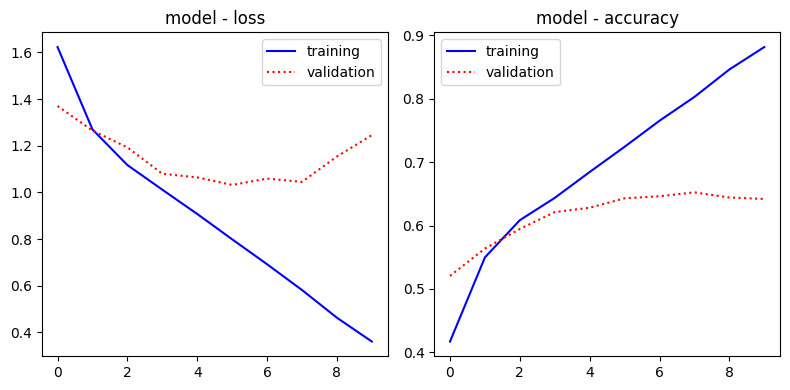

In [ ]:

import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plt.subplot(1, 2,1)
plt.plot(history.history['loss'],'b-', label = "training")
plt.plot(history.history['val_loss'], 'r:', label = "validation")
plt.title("model - loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.title("model - accuracy")

plt.plot(history.history['accuracy'], 'b-', label = "training")
plt.plot(history.history['val_accuracy'], 'r:', label = "validation")

plt.legend()
plt.tight_layout()
plt.show()

# 결과 
# 2에포크부터 이미 오버피팅이 되고있어서 성능향상이 잘 안되고있음이 보임

# model = sequential(~~
# 이 부분의 여러가지 파라미터 수치값들을 바꿔보고 실험해보기, 
# 런닝레이트 에포크 등등 파라미터 바꿔서 실험해보기.
# 하나 바꿀땐 나머지를 고정시켜야 변화를 제대로 알 수 있음.

### 이번엔 ResNet50를 사용해봅시다.

- ResNet50을 사용하기 위해서는 keras에 구현되어 있는 ResNet50 구조를 가져옵니다.

- pretrained를 가져오는 경우도 있지만, 지금은 ImageNet 세팅이 아니므로 구조만 가져옵니다.(input이 완전히 다름)

- Reference : https://keras.io/api/applications/resnet/#resnet50-function

In [ ]:

# load ResNet50


resnet = ResNet50(

)
# see ResNet50 model
resnet.summary()
### resnet training strategy

batch_size = 
epochs = 
lr = 

optimizer = 
loss_fn = 
metrics = 

resnet.compile(optimizer=optimizer,
               loss=loss_fn,
               metrics=metrics)
# training ResNet50
resnet_history = resnet.fit(X_train, y_train,
                            batch_size=batch_size,
                            epochs=epochs,
                            validation_data=(X_test, y_test),
                            verbose=1)
## loss visualize
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plt.subplot(1, 2,1)
plt.plot(resnet_history.history['loss'],'b-', label = "training")
plt.plot(resnet_history.history['val_loss'], 'r:', label = "validation")
plt.title("model - loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.title("model - accuracy")

plt.plot(resnet_history.history['accuracy'], 'b-', label = "training")
plt.plot(resnet_history.history['val_accuracy'], 'r:', label = "validation")

plt.legend()
plt.tight_layout()
plt.show()
